In [1]:
!pip install pandas
!pip install requests
!pip install beautifulsoup4
!pip install seaborn
!pip install matplotlib

  Using cached pandas-1.5.2-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
     |████████████████████████████████| 499 kB 743 kB/s            
     |████████████████████████████████| 19.8 MB 13.2 MB/s            
You should consider upgrading via the '/Users/student/Desktop/Kerakli/Project all/Django/Strengthening-My-knowledge-of-Python-through-the-Qwasar-Platform/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/student/Desktop/Kerakli/Project all/Django/Strengthening-My-knowledge-of-Python-through-the-Qwasar-Platform/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/student/Desktop/Kerakli/Project all/Django/Strengthening-My-knowledge-of-Python-through-the-Qwasar-Platform/venv/bin/python -m pip install --upgrade pip' command.
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.2-cp310-cp310-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached pyparsing-3.0.

In [2]:
from operator import itemgetter
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def request_url(url):
    data = requests.get(url)
    return data

In [4]:
def merge_contents(data):
    soup = BeautifulSoup(data.text, "html.parser")
    html_repos = soup.find_all("div", id="bodyContent", class_="vector-body")
    return html_repos

In [5]:
def tokenize(merge_content):
    s = ''
    for a in merge_content[:]:
        s += a.text + ' '
    arrange = [a for a in s.split()]
    return arrange

In [6]:
def remove_stop_words(collection):
    stop_words = ["the", "a", "of", "to", "in", "about", "and", "is", "by", "^", "that", "from", "on", "for", "was", "at", "as", "are", "it", "be", "uv","nm)", "an"]
    result = []
    for soz in collection:
        if not soz.isdigit():
            if soz.lower() not in stop_words:
                result.append(soz.lower())
    return result


In [7]:
def count_frequency(filtered_collection):
    sanash = {element: filtered_collection.count(element) for element in filtered_collection}

    sort = sorted(sanash.items(), key=itemgetter(1), reverse=True)

    tayyor = sort[0:26]
    
    return tayyor

In [8]:
def viz(frequencies):
    viz = pd.DataFrame.from_dict(frequencies)
    viz = viz.rename(columns={0: 'words', 1: 'count'})
    sns.barplot(y='words', x='count', data=viz)
    plt.show()

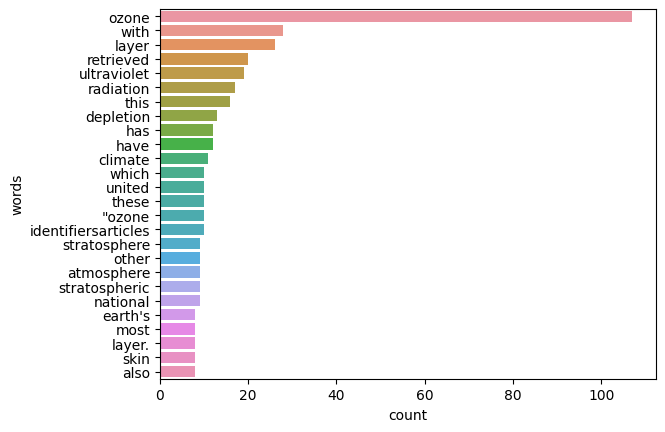

None


In [9]:
def main():
    url = 'https://en.wikipedia.org/wiki/Ozone_layer'
    data = request_url(url)
    merge_content = merge_contents(data)
    collection = tokenize(merge_content)
    filtered_collection = remove_stop_words(collection)
    frequencies = count_frequency(filtered_collection)
    vizual = viz(frequencies)

    print(vizual)


main()

Introduction:

It is time to get our hands dirty and to manipulate some real world data. You have been hired by a new company named EncyclEarthpedia and your first task it build a search engine.
EncyclEarthpedia is an online encyclopedia but specialized in the planet Earth, its geology, biology, and everything related to the Earth.

The search engine should be simple at first. The user needs to be able to type some words and the engine returns the most relevant articles.

There is a problem though. The engineers working on the database messed up and EncyclEarthpedia's database and API are not available for a week.
This is a bummer ! If we can't have access to the articles, how are we going to build our engine ?

Instead of waiting for a week, we are going to build a simple model for some similar article from Wikipedia.

What we are going to do is:

Get some article from Wikipedia to work with.
Extract meaningful and usable content from this article.
Clean up and filter the data to narrow the scope to relevant words
Build a simple frequency model.
Analysing the article based on this model.
This first work of this article would be the start of our search engine, using some notion from Information Retrieval and tf-idf statistic.

Getting the data
We are going to work with an article about the Ozone Layer.


First things first: Let's get the content of this article into code variables.

→ Use Wikipedia's API to retrieve the content of the article

Create a function get_content(article_name) to retrieve information about an article.

→ Using pip install wikipedia and import wikipedia is strictly forbidden!

Printing your result, you should see something similiar to: